In [1]:
import sys
import argparse
import os

sys.argv = ["view", "--config", "../../config/single_task_object_detection.yaml"]

parser = argparse.ArgumentParser()
parser.add_argument("--config", type=str, required=True, help="Path to the config file")
args = parser.parse_args()

print(args.config)

../../config/single_task_object_detection.yaml


In [2]:
os.getcwd()
os.chdir("../../")
os.getcwd()

'/data01/dl23vitcas/dl_project'

In [3]:
import cv2
from PIL import Image
import numpy as np


def create_image_pyramid(image, levels):
    pyramid = [image]
    for i in range(1, levels):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid


img = Image.open("data/VOC2008_attribute/train/2008_000008.jpg")
img = np.asarray(img)
print(create_image_pyramid(img, 2)[0].shape)
print(create_image_pyramid(img, 2)[1].shape)

(442, 500, 3)
(221, 250, 3)


In [4]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
def create_image_pyramid(image, levels):
    pyramid = [image]
    for i in range(1, levels):
        scaled_image = F.interpolate(
            image, scale_factor=1 / (2**i), mode="bilinear", align_corners=False
        )
        pyramid.append(scaled_image)
    return pyramid

In [7]:
image_path = "data/VOC2008_attribute/train/2008_000008.jpg"
image = Image.open(image_path)
transform = transforms.ToTensor()
image_tensor = transform(image).unsqueeze(0)

In [8]:
levels = 5  # Numero di livelli nella piramide
pyramid = create_image_pyramid(image_tensor, levels)

torch.Size([1, 3, 442, 500])
torch.Size([1, 3, 221, 250])
torch.Size([1, 3, 110, 125])
torch.Size([1, 3, 55, 62])
torch.Size([1, 3, 27, 31])


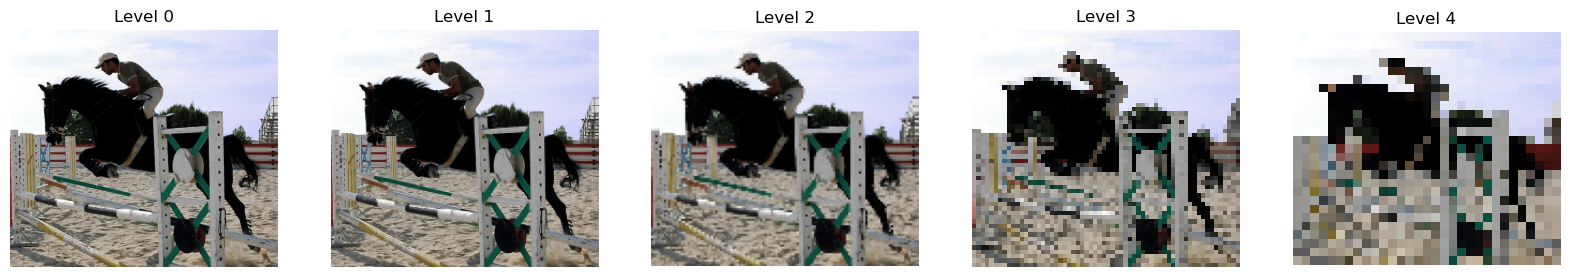

In [11]:
def show_image_pyramid(pyramid):
    fig, axes = plt.subplots(1, len(pyramid), figsize=(20, 5))
    for i, img in enumerate(pyramid):
        axes[i].imshow(
            img.squeeze().permute(1, 2, 0)
        )  # Rimuovere la dimensione batch e riordinare i canali per matplotlib
        print(img.shape)
        axes[i].axis("off")
        axes[i].set_title(f"Level {i}")
    plt.show()


show_image_pyramid(pyramid)